# Classification
---
    Using YoLov5 Model

## 1. Image Classification

### Clone YoLov5

In [ ]:
%cd /content

!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.0-140-g19c56e6 torch 1.10.0+cu111 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.9/225.9 GB disk)


In [114]:
from IPython.display import Image
import os

# 찾을 이미지 경로
val_img_path = str(input('판별을 원하는 이미지의 경로를 입력해주세요 >> '))



# # Detecting
YOLO_PATH = '/content/yolov5'
os.chdir(YOLO_PATH)
!python detect.py --weights /content/yolov5/runs/train/final_result2/weights/best64_300.pt --img 416 --conf 0.5 --source "{val_img_path}" --save-crop --save-txt


판별을 원하는 이미지의 경로를 입력해주세요 >> /content/drive/MyDrive/Torch_Prac/Pytorch-tutorial/#2/32_test.jpg
detect: weights=['/content/yolov5/runs/train/final_result2/weights/best64_300.pt'], source=/content/drive/MyDrive/Torch_Prac/Pytorch-tutorial/#2/32_test.jpg, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-140-g19c56e6 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7091035 parameters, 0 gradients, 16.1 GFLOPs
image 1/1 /content/drive/MyDrive/Torch_Prac/Pytorch-tutorial/#2/32_test.jpg: 256x416 1 32, Done. (0.146s)
Speed: 0.9ms pre-process, 145.9ms inference, 1.1ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp29
1 labels saved to runs

In [115]:
text_name = val_img_path.split('/')[-1][:-4]

### Check Our Detecting Result
---

In [116]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

model = torch.hub.load('ultralytics/yolov5', 'custom', path = '/content/yolov5/runs/train/final_result2/weights/best64_300.pt', force_reload= True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 v6.0-140-g19c56e6 torch 1.10.0+cu111 CPU

Fusing layers... 



requirements: 1 package updated per /content/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



Model Summary: 213 layers, 7091035 parameters, 0 gradients, 16.1 GFLOPs
Adding AutoShape... 


In [117]:
Image = cv2.imread(val_img_path)
Image = cv2.cvtColor(Image, cv2.COLOR_BGR2RGB)


In [118]:
results = model(Image)

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


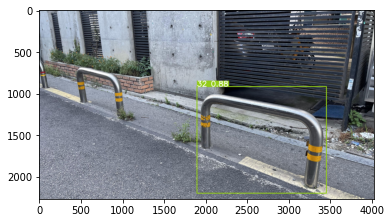

<Figure size 3600x3600 with 0 Axes>

In [119]:
# 결과! 

%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.figure(figsize=(50,50))
plt.show()

### Checking Error(1) Or Not(0)
---
Using EfficentNet

In [136]:
# YoLo Label의 클래스르 가져와야한다. 
PATH = '/content/yolov5/runs/detect'

os.chdir(PATH)

file_list = os.listdir()

result_index = str(input('보고자하는 결과의 exp(Labels) >>> Labels를 입력해주세요 >> '))
try:
  f = open(f'exp{result_index}/labels/{text_name}.txt','r')

  results= [] # Lbaeling 결과
  class_names = [] # 그 중 Category 명 확인

  while True:
    line = f.readline()
    results.append(line)

    if not line:
      break
  class_names.append(results[0].split(' ')[0])
  f.close()
except:
  print('사물을 인식하지 못하였습니다. 다른 이미지를 넣어주세요!')

보고자하는 결과의 exp(Labels) >>> Labels를 입력해주세요 >> 29


In [137]:
class_names

['26']

In [138]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import os
from PIL import Image
import random
import numpy as np
import cv2
import glob
import PIL.ImageOps
import shutil

In [152]:


# class명만 받읍시다.
#욜로 결과를 받아왔다는 가정 이 부분 수정 필요
for class_name in class_names:
  class_name = str(class_name)

  #모델 받아오기
  import torch
  import torch.nn as nn
  from math import ceil

  base_model = [
    # expand_ratio, channels, repeats, stride, kernel_size
    [1, 16, 1, 1, 3],
    [6, 24, 2, 2, 3],
    [6, 40, 2, 2, 5],
    [6, 80, 3, 2, 3],
    [6, 112, 3, 1, 5],
    [6, 192, 4, 2, 5],
    [6, 320, 1, 1, 3]
  ]

  phi_values = {
      # tuple of : (phi_value, resolution, drop_rate)
      "b0" : (0, 224, 0.2),  #alpha, beta, gamma, depth = alpha ** phi
      "b1" : (0.5, 240, 0.2),
      "b2" : (1, 260, 0.3),
      "b3" : (2, 300, 0.3),
      "b4" : (3, 380, 0.4),
      "b5" : (4, 456, 0.4),
      "b6" : (5, 528, 0.5),
      "b7" : (6, 600, 0.5),
  }

  class CNNBlock(nn.Module) : 
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding, groups = 1) : 
      super(CNNBlock, self).__init__()
      self.cnn = nn.Conv2d(
          in_channels, 
          out_channels,
          kernel_size,
          stride,
          padding,
          groups = groups,
          bias = False,
      )
      self.bn = nn.BatchNorm2d(out_channels)
      self.silu = nn.SiLU()  # SILU <-> Swish
    def forward(self, x) : 
      return self.silu(self.bn(self.cnn(x)))

  class SqueezeExcitation(nn.Module) : 
    def __init__(self, in_channels, reduced_dim) : 
      super(SqueezeExcitation, self).__init__()
      self.se = nn.Sequential(
          nn.AdaptiveAvgPool2d(1),  # C x H x @ -> C x 1 x 1
          nn.Conv2d(in_channels, reduced_dim, 1),
          nn.SiLU(),
          nn.Conv2d(reduced_dim, in_channels, 1),
          nn.Sigmoid()
      )
    def forward(self, x) : 
      return x * self.se(x)

  class InvertedResidualBlock(nn.Module) : 
    def __init__(
        self, 
        in_channels, 
        out_channels, 
        kernel_size, 
        stride, 
        padding, 
        expand_ratio, 
        reduction = 4,   # squeeze excitation
        survival_prob = 0.8,  # for stochastic depth
        ) : 
        super(InvertedResidualBlock, self).__init__()
        self.survival_prob = 0.8
        self.use_residual = in_channels == out_channels and stride == 1
        hidden_dim = in_channels * expand_ratio
        self.expand = in_channels != hidden_dim
        reduced_dim = int(in_channels / reduction)

        if self.expand : 
          self.expand_conv = CNNBlock(
              in_channels, hidden_dim, kernel_size = 3, stride = 1, padding = 1,
          )
        
        self.conv = nn.Sequential(
            CNNBlock(
                hidden_dim, hidden_dim, kernel_size, stride, padding, groups = hidden_dim,
            ),
            SqueezeExcitation(hidden_dim, reduced_dim),
            nn.Conv2d(hidden_dim, out_channels, 1, bias = False),
            nn.BatchNorm2d(out_channels),

        )
      
    def stochastic_depth(self, x) : 
      if not self.training : 
        return x
      
      binary_tensor = torch.rand(x.shape[0], 1, 1, 1, device = x.device) < self.survival_prob
      return torch.div(x, self.survival_prob) * binary_tensor

    def forward(self, inputs) : 
      x = self.expand_conv(inputs) if self.expand else inputs
      if self.use_residual : 
        return self.stochastic_depth(self.conv(x)) + inputs
      else : 
        return self.conv(x)


  class EfficientNet(nn.Module) : 
    def __init__(self, version, num_classes) : 
      super(EfficientNet, self).__init__()
      width_factor, depth_factor, dropout_rate = self.calculate_factors(version)
      last_channels = ceil(1280 * width_factor)
      self.pool = nn.AdaptiveAvgPool2d(1)
      self.features = self.create_features(width_factor, depth_factor, last_channels)
      self.classifier = nn.Sequential(
          nn.Dropout(dropout_rate),
          nn.Linear(last_channels, num_classes),

      )

    def calculate_factors(self, version, alpha = 1.2, beta = 1.1) : 
      phi, res, drop_rate = phi_values[version]
      depth_factor = alpha ** phi
      width_factor = beta ** phi
      return width_factor, depth_factor, drop_rate

    def create_features(self, width_factor, depth_factor, last_channels) : 
      channels = int(32 * width_factor)
      features = [CNNBlock(3, channels, 3, stride = 2, padding = 1)]
      in_channels = channels

      for expand_ratio, channels, repeats, stride, kernel_size in base_model :     
        out_channels = 4 * ceil(int(channels * width_factor) / 4)
        layers_repeats = ceil(repeats * depth_factor)

        for layer in range(layers_repeats) : 
          features.append(
              InvertedResidualBlock(
                  in_channels,
                  out_channels,
                  expand_ratio = expand_ratio,
                  stride = stride if layer == 0 else 1,
                  kernel_size = kernel_size,
                  padding = kernel_size//2,  # if k = 1 : pad = 0, k = 3 : pad = 1, k = 5 : pad = 2
              )
          )
          in_channels = out_channels

      features.append(CNNBlock(in_channels, last_channels, kernel_size = 1, stride = 1, padding = 0))

      return nn.Sequential(*features)
    
    def forward(self, x) : 
      x = self.pool(self.features(x))
      return self.classifier(x.view(x.shape[0], -1))


  version = 'b0'
  phi, res, drop_rate = phi_values[version]
  num_classes = 2
  net = EfficientNet(
      version = version,
      num_classes = num_classes,
  )


  #데이터 불러오기
  transform = transforms.Compose([transforms.Resize((224,224)),   # b1 -> 240 (width) 
                                  # transforms.CenterCrop(128),  # 무작위로 가운데 부분을 224 크기로 자르기 - square하는 것 같음
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

  #경로 설정 맞춰서 수정 필요
  PATH = f'/content/drive/MyDrive/Torch_Prac/Pytorch-tutorial/#2/Model/{class_name}.pt'
  net.load_state_dict(torch.load(PATH))

  img = Image.open(val_img_path)
  img = transform(img).unsqueeze(dim = 0)
  prediction = net(img)
  final_result = torch.argmax(prediction)
  print(final_result)





RuntimeError: ignored

detect: weights=['/content/yolov5/runs/train/final_result2/weights/best64_300.pt'], source=/content/drive/MyDrive/Torch_Prac/Pytorch-tutorial/#2/32_test.jpg, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-140-g19c56e6 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7091035 parameters, 0 gradients, 16.1 GFLOPs
image 1/1 /content/drive/MyDrive/Torch_Prac/Pytorch-tutorial/#2/32_test.jpg: 256x416 1 32, Done. (0.144s)
Speed: 0.7ms pre-process, 143.5ms inference, 1.3ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp30
1 labels saved to runs/detect/exp30/labels


Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 v6.0-140-g19c56e6 torch 1.10.0+cu111 CPU




requirements: 1 package updated per /content/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



Fusing layers... 
Model Summary: 213 layers, 7091035 parameters, 0 gradients, 16.1 GFLOPs
Adding AutoShape... 
/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


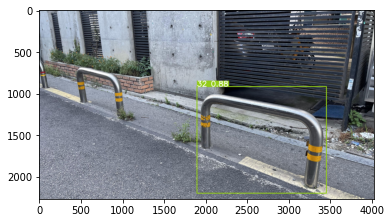

<Figure size 3600x3600 with 0 Axes>

In [154]:
# 불량일때

if final_result == 1:
  # 경로 수정 

  YOLO_PATH = '/content/yolov5'
  os.chdir(YOLO_PATH)

  # weight 수정해서. (양호 / 불량 pt로 )
  !python detect.py --weights /content/yolov5/runs/train/final_result2/weights/best64_300.pt --img 416 --conf 0.5 --source "{val_img_path}" --save-crop --save-txt

  # weight 수정해서
  model = torch.hub.load('ultralytics/yolov5', 'custom', path = '/content/yolov5/runs/train/final_result2/weights/best64_300.pt', force_reload= True)

  Image = cv2.imread(val_img_path)
  Image = cv2.cvtColor(Image, cv2.COLOR_BGR2RGB)
  results = model(Image)

  # 결과! 

  %matplotlib inline
  plt.imshow(np.squeeze(results.render()))
  plt.figure(figsize=(50,50))
  plt.show()
  

  
else:
  
  YOLO_PATH = '/content/yolov5'
  os.chdir(YOLO_PATH)

  !python detect.py --weights /content/yolov5/runs/train/final_result2/weights/best64_300.pt --img 416 --conf 0.5 --source "{val_img_path}" --save-crop --save-txt

  model = torch.hub.load('ultralytics/yolov5', 'custom', path = '/content/yolov5/runs/train/final_result2/weights/best64_300.pt', force_reload= True)

  Image = cv2.imread(val_img_path)
  Image = cv2.cvtColor(Image, cv2.COLOR_BGR2RGB)
  results = model(Image)

  # 결과! 
  %matplotlib inline
  plt.imshow(np.squeeze(results.render()))
  plt.figure(figsize=(50,50))
  plt.show()







In [ ]:
from sklearn import metrics

y_true = []
y_pred = []

with torch.no_grad() : 
  net.eval()  # evaluation 과정에서 사용하지 않아야 하는 layer들을 알아서 off 시키도록 하는 함수(보통 dropout, batchnorm layer)
  total_loss = 0.0
  total_correct = 0.0

  for inputs, labels in test_set : 
    outputs = net(inputs)
    preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)
    total_loss += loss.item() * inputs.size(0)
    output_idx = torch.argmax(outputs, dim = 1)
    total_correct +=sum(labels == output_idx)
    for i in range(len(labels.data.tolist())) : 
      y_true.append(labels.data.tolist()[i])
      y_pred.append(preds.indices.tolist()[i])

# # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
# print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
# imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

epoch_loss = total_loss / test_len
epoch_acc = total_correct / test_len * 100.
print('[Test Phase] Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))
print('precision:', metrics.precision_score(y_true, y_pred))
print('recall:', metrics.recall_score(y_true, y_pred))
print('f1_score:', metrics.f1_score(y_true, y_pred))

### Error Area Check
---
Using YoLov5

In [ ]:
# 위 결과에서 불량로 판단할 경우
# Error Area Check 
